In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import glob

In [2]:
dpath = "/scratch/indikar_root/indikar1/shared_data/single_cell/align_table/"
file_list = glob.glob(f"{dpath}*")
file_list[:10]

['/scratch/indikar_root/indikar1/shared_data/single_cell/align_table/o1b18.GRCm39.align_table.parquet',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/align_table/o2b03.GRCm39.align_table.parquet',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/align_table/o4b04.GRCm39.align_table.parquet',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/align_table/o4b79.GRCm39.align_table.parquet',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/align_table/o3b86.GRCm39.align_table.parquet',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/align_table/o1b15.GRCm39.align_table.parquet',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/align_table/o1b89.GRCm39.align_table.parquet',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/align_table/o1b26.GRCm39.align_table.parquet',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/align_table/o4b07.GRCm39.align_table.parquet',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/align_t

In [3]:
columns = [
    'mapping_quality',
]

mapping_qualities = []

# Define bins and labels
bins = [0, 10, 20, 30, 40, 50, 61]  # Include -inf to catch NaNs
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60']

results = []

for i, file_path in enumerate(file_list):
    if i % 25 == 0:
        print(f"{i} of {len(file_list)}")
    basename = os.path.basename(file_path)
    sample_id = basename[:2]
    file_id = basename[2:5]
    df = pd.read_parquet(file_path, columns=columns)
    mapping_qualities += df['mapping_quality'].to_list() 
    
    df['bucket'] = pd.cut(df['mapping_quality'], bins=bins, labels=labels, right=False) 
    row = df['bucket'].value_counts(dropna=False) / len(df)
    row = row.to_dict()
    row['sample_id'] = sample_id
    row['file_id'] = file_id
    row['total'] = len(df)
    
    results.append(row)    
    

results = pd.DataFrame(results )
results.head()

0 of 380
25 of 380
50 of 380
75 of 380
100 of 380
125 of 380
150 of 380
175 of 380
200 of 380
225 of 380
250 of 380
275 of 380
300 of 380
325 of 380
350 of 380
375 of 380


,0-10,50-60,10-20,20-30,30-40,40-50,sample_id,file_id,total
0,0.447012,0.414277,0.048941,0.033394,0.029128,0.027249,o1,b18,4035840
1,0.893394,0.087927,0.005011,0.008200,0.002278,0.003189,o2,b03,2195
2,0.384831,0.504205,0.033545,0.023853,0.028797,0.024768,o4,b04,81919
3,0.927705,0.062901,0.003092,0.002021,0.001427,0.002854,o4,b79,8410
4,0.470733,0.408024,0.038014,0.027437,0.031973,0.023819,o3,b86,168860


In [4]:
# break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [5]:
results.columns

Index(['0-10', '50-60', '10-20', '20-30', '30-40', '40-50', 'sample_id',
       'file_id', 'total'],
      dtype='object')

Text(0.5, 0, 'Mapping Quality')

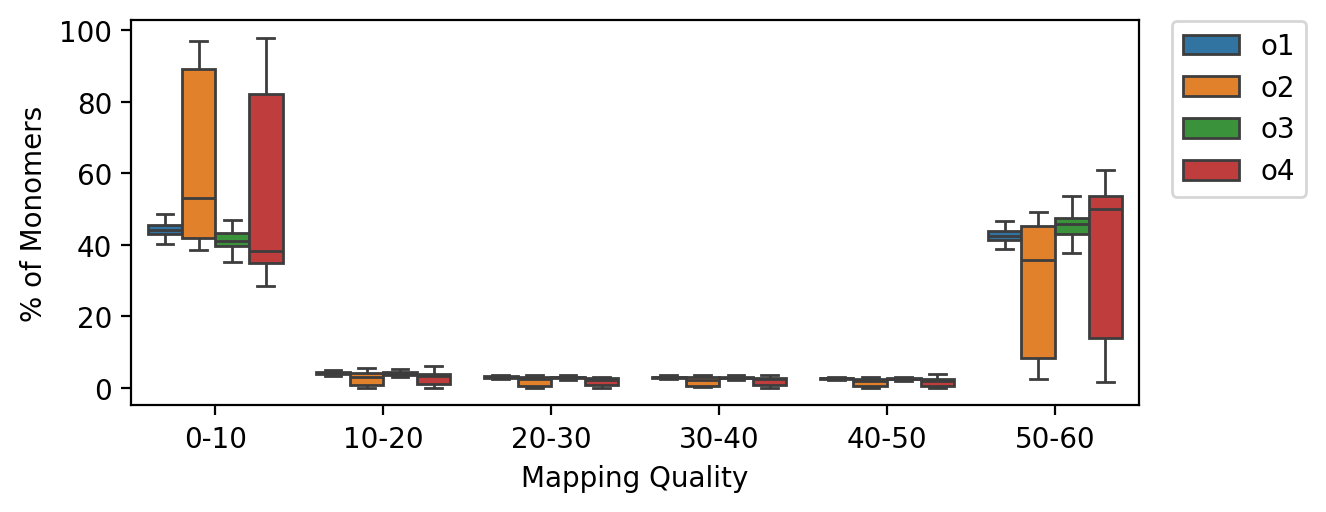

In [8]:
pdf = results.copy()
pdf = pd.melt(pdf, id_vars=['sample_id', 'file_id'],
              value_vars=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60',])

pdf = pdf.sort_values(by=['sample_id', 'variable'])
pdf['percent'] = pdf['value'] * 100

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6.5, 2.5

sns.boxplot(data=pdf, 
            x='variable',
            y='percent',
            hue='sample_id',
            showfliers=False,
           )

sns.move_legend(plt.gca(), 
                title='',
                loc='upper right',
                bbox_to_anchor=(1.18, 1.035))

plt.ylabel('% of Monomers')
plt.xlabel('Mapping Quality')

<Axes: ylabel='Count'>

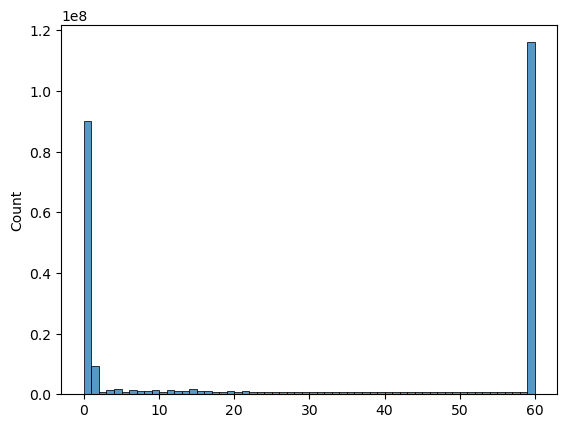

In [7]:
sns.histplot(x=mapping_qualities,
             bins=60)